<img src="../Img/Python_SQL_PI.png" style="width:100%">


14 февраля 2022 года,<br>
Поток: ПИ20-1, ПИ20-2, ПИ20-3, ПИ20-4, ПИ20-5, ПИ20-6 (4 подгруппа) <br>
Поток: ПИ20-1, ПИ20-2, ПИ20-3, ПИ20-4, ПИ20-5, ПИ20-6 (3 подгруппа) <br>

17 февраля 2022 года <br>
Поток: ПИ20-1, ПИ20-2, ПИ20-3, ПИ20-4, ПИ20-5, ПИ20-6 (1 подгруппа) <br>
Поток: ПИ20-1, ПИ20-2, ПИ20-3, ПИ20-4, ПИ20-5, ПИ20-6 (2 подгруппа) <br>

Вебинар<br>

<p style="font-size:22px;text-align:center">Семинар 1.2.</p>

<p style="font-size:22px;text-align:center">Работа с табличными данными с помощью библиотеки Pandas</p>

Преподаватель: Смирнов Михаил Викторович, доцент Департамента Анализа данных и машинного обучения Финансового университета при Правительстве Российской Федерации

## Основы работы с Pandas

*Pandas* - библиотека для работы с данными. Имеется подробная [документация](http://pandas.pydata.org/pandas-docs/stable/) с множеством примеров. *Pandas* не встроен в Python по умолчанию, его необходимо импортировать. Чаще всего *pandas* импортируют c псевдонимом `pd`.

In [23]:
import pandas as pd

### Учебный пример

Для изучения технологии работы с этой библиотекой будем использовать [учебный пример финансовой информации](../Data/FinancialSample3.csv).

Прежде, чем переходить к учебному примеру, рассмотрим основные объекты Pandas - *Series* и *DataFrame*

### Series

*Series* - это структура данных, которую можно рассматривать, как одну колонку таблицы, это одномерный массив. Ранее мы изучили похожий одномерный массив - список, доступ к элементам которого осуществлялся по индексу, представляющему собой порядковый номер. В *Series* индексами могут быть не только порядковые номера, но и другие данные: даты, имена, идентификаторы различных объектов и т.д.

Создать *Series* можно с помощью команды `pd.Series()` (или `pandas.Series()`, если библиотека pandas импортирована без псевдонима). Создадим *Series* с данными об автомобилях - лидерах продаж в России в 2020 году.

In [24]:
leaders = pd.Series(['Лада Гранта', 'Лада Веста', 'Kia Rio', 'Hyundai Creta'], index=['Первое','Второе','Третье','Четвертое'])
leaders

Первое         Лада Гранта
Второе          Лада Веста
Третье             Kia Rio
Четвертое    Hyundai Creta
dtype: object

Индекс можно не указывать, тогда он будет создан автоматически и содержать порядковые номера элементов, начиная с нуля. Доступ к элементам Series осуществляется с использованием методов `.loc[]` и `.iloc[]`. В чем разница между ними? Параметром `.loc[]` является метка индекса, параметром `.iloc[]` является целочисленный порядковый номер элемента.

In [25]:
#Примеры использования .loc
print(leaders.loc['Первое']) # Доступ к одному элементу
print(leaders.loc[['Первое','Четвертое']]) # Доступ к нескольким элементам
print()

#Примеры использования .iloc
print(leaders.iloc[0]) # Доступ к одному элементу
print(leaders.iloc[[0,3]]) # Доступ к нескольким элементам

Лада Гранта
Первое         Лада Гранта
Четвертое    Hyundai Creta
dtype: object

Лада Гранта
Первое         Лада Гранта
Четвертое    Hyundai Creta
dtype: object


<u>Задание</u>. Имеется *серия*, содержащая числа от 10 до 1000. Какое число содержит элемент с индексом 175? Вычислите разность элементов с индексами 900 и 16.

In [26]:
s = pd.Series(range(10,1001))
# Ваш код здесь

print(s.iloc[175])
print(s.iloc[900]-s.iloc[16])

185
884


### DataFrame

Объект *DataFrame* представляет собой таблицу, столбцами которой выступают объекты *Series*. Строки *Series* являются элементами *DataFrame*. Рассмотрим основные способы создания датафрейма: из словаря, из списка, с помощью функции `read_csv()`.

#### Из словаря

Создавать датафрейм удобно из словаря. Словарь представляет собой заключенные в квадратные скобки пары `{ключ:значение}`. Такие парыстоновятся столбцами датафрейма, при этом имена ключей становятся названиями стобцов, значения становятся элементами столбцов.

In [27]:
market = pd.DataFrame({'car':['Lada Granta','Lada Vesta','Kia Rio','Hyunday Creta'], 'year':[2019,2018,2010,2015], 'condition':[75,104,20,90], 'km':[130000,210000,75000,94000]})
market

,car,year,condition,km
0,Lada Granta,2019,75,130000
1,Lada Vesta,2018,104,210000
2,Kia Rio,2010,20,75000
3,Hyunday Creta,2015,90,94000


#### Из списка

*DataFrame* можно создать из списка списков или списка кортежей. Необязательными параметрами являются `columns` и `index`. Рассмотрим пример создания датафрейма из списка списков. Пусть имеются сведения о результатах торгов за два дня. Создадим список из двух вложенных списков, каждый из которых содержит четыре элемента: цена открытия, минимальная и максимальная цены в течение дня, цена закрытия. Число вложенных списков равно числу строк, число их элементов равно числу столбцов.

In [28]:
history=pd.DataFrame([[150, 20, 140, 140],[140,94,152,150]],columns=['Open','Low','High','Close'],index=['2020-12-07', '2020-12-08'])
history

,Open,Low,High,Close
2020-12-07,150,20,140,140
2020-12-08,140,94,152,150


Следующий пример демонстрирует возможность создания датафрейма из кортежа. Пусть имеются данные о температуре и давлении в три первых дня мая. Оформим пары (температура, давление) в виде списка кортежей и передадим такой список в качестве параметра `pd.DataFrame()`

In [29]:
may=pd.DataFrame([(15,750),(17,752),(22,)], index=[1,2,3], columns=['Temperature','Pressure'])
may

,Temperature,Pressure
1,15,750.0
2,17,752.0
3,22,NaN


<u>Задание</u>. Мебельная фабрика выпускает продукцию  наименований: диваны, кровати, трюмо. Создайте таблицу *DatаFrame*, содержащую: количество призведенной продукции каждого наименования, остаток на складе фабрики. Наименования разместите в строках, а количество и остаток в столбцах.

<u>Задание</u>. Разделите столбец **car** таблицы **market** на два столбца: **mark** (марка) и **model** (модель).

In [30]:
market

,car,year,condition,km
0,Lada Granta,2019,75,130000
1,Lada Vesta,2018,104,210000
2,Kia Rio,2010,20,75000
3,Hyunday Creta,2015,90,94000


In [31]:
market[['mark', 'model']] = market['car'].str.split(expand=True)
market

,car,year,condition,km,mark,model
0,Lada Granta,2019,75,130000,Lada,Granta
1,Lada Vesta,2018,104,210000,Lada,Vesta
2,Kia Rio,2010,20,75000,Kia,Rio
3,Hyunday Creta,2015,90,94000,Hyunday,Creta


In [32]:
market["mark"]=market["car"].apply(lambda x:x.split()[0])
market["model"]=market["car"].apply(lambda x:x.split()[1])
market

,car,year,condition,km,mark,model
0,Lada Granta,2019,75,130000,Lada,Granta
1,Lada Vesta,2018,104,210000,Lada,Vesta
2,Kia Rio,2010,20,75000,Kia,Rio
3,Hyunday Creta,2015,90,94000,Hyunday,Creta


In [33]:
market['car'].str.split(expand=True)

,0,1
0,Lada,Granta
1,Lada,Vesta
2,Kia,Rio
3,Hyunday,Creta


#### С помощью функции read_csv()


Файл `.csv` - это текстовый файл с разделителями. Функция `read_csv()` позволяет получить данные, хранящиеся в формате `csv`. Обязательным параметром является имя файла.

`pd.read_csv('Полный_путь_к_файлу/название_файла.csv')`

Функция возвращает таблицу DataFrame. Важными параметрами функции являются: 
<PRE>
`sep` - разделитель, по умолчанию запятая;
`decimal` - разделитель числа на целую и дробную часть, по умолчанию точка;
`names` — список с названиями колонок, необязательный параметр;
`skiprows` - позволяет не загружать верхние строки файла.
</Pre>

Используем функцию read_csv() для создания датафрейма из csv-файла учебного примера `Financial Sample.csv`.

In [34]:
fs = pd.read_csv('../Data/FinancialSample3.csv', sep=';')
fs

,Id,Segment,Country,Product,DiscountBand,UnitsSold,ManufacturingPrice,SalePrice,GrossSales,Discounts,Sales,COGS,Profit,Date,MonthNumber,MonthName,Year
0,1,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.00,32370.0,16185.0,16185.000,2014-01-01,1.0,January,2014.0
1,2,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.00,26420.0,13210.0,13210.000,2014-01-01,1.0,January,2014.0
2,3,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.00,32670.0,21780.0,10890.000,2014-06-01,6.0,June,2014.0
3,4,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.00,13320.0,8880.0,4440.000,2014-06-01,6.0,June,2014.0
4,5,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.00,37050.0,24700.0,12350.000,2014-06-01,6.0,June,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1395,1396,Small Business,Albania,Carretera,Green,2348.0,97.0,164.9,10772.0,18.32,10666.0,7540.4,3871.852,2014-12-13,12.0,December,2014.0
1396,1397,Government,Finland,Montana,Green,2184.0,115.0,195.5,19337.0,21.72,16125.0,13535.9,4269.720,2014-11-24,11.0,November,2014.0
1397,1398,Enterprise,Albania,Velo,Medium,2756.0,73.0,124.1,17624.0,13.79,15757.0,12336.8,3420.196,2014-04-20,4.0,April,2014.0
1398,1399,Enterprise,Mexico,Nice,Green,2060.0,64.0,108.8,19143.0,12.09,21038.0,13400.1,2241.280,2014-11-10,11.0,November,2014.0


### Методы *head(), tail(), sample()*

Выводят на печать первые, последние или случайные строки таблицы. Например, метод `.head()` выводит пять первых строк. Число строк можно явно указывать в качестве параметра метода.

In [35]:
fs.head()

,Id,Segment,Country,Product,DiscountBand,UnitsSold,ManufacturingPrice,SalePrice,GrossSales,Discounts,Sales,COGS,Profit,Date,MonthNumber,MonthName,Year
0,1,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1.0,January,2014.0
1,2,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1.0,January,2014.0
2,3,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6.0,June,2014.0
3,4,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6.0,June,2014.0
4,5,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6.0,June,2014.0


### Чтение и запись в файл

При работе с `csv` файлами в *pandas* всегда надо стремиться использовать функцию `read_csv()`. Но если, по каким-то причинам, это нецелесообразно, то можно применить следующий алгоритм:

1. Открыть файл
2. Прочитать его построчно
3. Каждую строку разбить на элементы и включить в список уровня строки
4. Создать список уровня файла, содержащий в себе построчные списки
5. Создать DataFtame


<u>Пример</u>. Применим этот алгоритм для создадания датафрейма из csv-файла `Financial Sample Fields.csv`.

In [36]:
with open('../Data/FinancialSampleFields.csv', encoding='utf-8') as f:
  content = f.readlines()
  content = [x.replace('\n','').split(';') for x in content]

pd.DataFrame(content[1:],columns = content[0])

,Name,Meaning
0,Segment,Сегмент рынка
1,Country,Страна
2,Product,Сделано в
3,DiscountBand,Группа скидок
4,UnitsSold,Продано штук
5,ManufacturingPrice,Цена производства
6,SalePrice,Цена единицы товара
7,GrossSales,Валовая продажа
8,Discounts,Скидка
9,Sales,Стоимость партии товара


### Метод *info()*

Метод *info()* предоставляет информацию о колонках *DataFrame*.

In [37]:
fs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1400 entries, 0 to 1399
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1400 non-null   int64  
 1   Segment             1400 non-null   object 
 2   Country             1400 non-null   object 
 3   Product             1400 non-null   object 
 4   DiscountBand        1400 non-null   object 
 5   UnitsSold           1400 non-null   float64
 6   ManufacturingPrice  1400 non-null   float64
 7   SalePrice           1400 non-null   float64
 8   GrossSales          1400 non-null   float64
 9   Discounts           1400 non-null   float64
 10  Sales               1400 non-null   float64
 11  COGS                1400 non-null   float64
 12  Profit              1400 non-null   float64
 13  Date                1400 non-null   object 
 14  MonthNumber         1400 non-null   float64
 15  MonthName           1400 non-null   object 
 16  Year  

### Метод *describe()*

Метод describe показывает основные статистические характеристики данных по каждому числовому признаку (типы int64 и float64): 
<PRE>
count - число непропущенных значений,
mean - среднее, 
std - стандартное отклонение, 
min, max - диапазон,
50% - медиану,
25%, 75% - первый и третий квартили.
</Pre>

In [38]:
fs.describe()

,Id,UnitsSold,ManufacturingPrice,SalePrice,GrossSales,Discounts,Sales,COGS,Profit,MonthNumber,Year
count,1400.0000,1400.000000,1400.000000,1400.000000,1.400000e+03,1400.000000,1.400000e+03,1400.000000,1400.000000,1400.000000,1400.000000
mean,700.5000,1876.230000,90.720714,131.433929,9.891150e+04,6583.201779,9.105943e+04,78009.859214,13615.445214,7.194286,2013.875000
std,404.2895,771.770374,78.260912,100.449932,1.983462e+05,17510.508997,1.849289e+05,159130.700169,32013.727239,3.533881,0.330837
min,1.0000,200.000000,3.000000,7.000000,1.799000e+03,0.000000,3.030000e+02,918.000000,-40617.500000,1.000000,2013.000000
25%,350.7500,1361.250000,10.000000,20.000000,1.322950e+04,15.062500,9.242435e+03,8653.550000,2381.953500,4.000000,2014.000000
50%,700.5000,1897.000000,81.000000,125.000000,1.762450e+04,21.720000,1.786350e+04,11580.400000,3599.240000,8.000000,2014.000000
75%,1050.2500,2469.250000,116.000000,178.500000,3.798000e+04,2579.625000,3.551750e+04,22484.375000,9242.000000,10.000000,2014.000000
max,1400.0000,4492.500000,260.000000,350.000000,1.207500e+06,149677.500000,1.159200e+06,950625.000000,262200.000000,12.000000,2014.000000


Чтобы посмотреть статистику по нечисловым данным (например, по строчным `object` или логическим `bool`), нужно явно указать интересующие типы в параметре `include`. Для каждой колонки с типом `object` (строчные данные) выводится количество непустых строк, уникальных значений, самое частое значение `top` и частота этого значения `freq`.

In [39]:
fs.describe(include=['object'])

,Segment,Country,Product,DiscountBand,Date,MonthName
count,1400,1400,1400,1400,1400,1400
unique,8,9,9,6,314,12
top,Government,Mexico,Paseo,High,2014-12-01,October
freq,389,233,285,384,74,192


Задание.
Ответьте на вопросы.

1. Какова максимальная сумма скидок?
2. Какова самая распространенная система скидок?
3. Сколько разных систем скидок применяется?
4. Какова средняя прибыль?
5. Каково стандартное отклонение значений себестоимости проданных товаров?
6. Сколько раз встречается самая частая страна?
7. Какое значение у первого квартиля цены продажи?


In [40]:
fs.head()

,Id,Segment,Country,Product,DiscountBand,UnitsSold,ManufacturingPrice,SalePrice,GrossSales,Discounts,Sales,COGS,Profit,Date,MonthNumber,MonthName,Year
0,1,Government,Canada,Carretera,None,1618.5,3.0,20.0,32370.0,0.0,32370.0,16185.0,16185.0,2014-01-01,1.0,January,2014.0
1,2,Government,Germany,Carretera,None,1321.0,3.0,20.0,26420.0,0.0,26420.0,13210.0,13210.0,2014-01-01,1.0,January,2014.0
2,3,Midmarket,France,Carretera,None,2178.0,3.0,15.0,32670.0,0.0,32670.0,21780.0,10890.0,2014-06-01,6.0,June,2014.0
3,4,Midmarket,Germany,Carretera,None,888.0,3.0,15.0,13320.0,0.0,13320.0,8880.0,4440.0,2014-06-01,6.0,June,2014.0
4,5,Midmarket,Mexico,Carretera,None,2470.0,3.0,15.0,37050.0,0.0,37050.0,24700.0,12350.0,2014-06-01,6.0,June,2014.0


In [63]:
print(fs["Discounts"].max())
print(max(fs["Discounts"]))
print(fs.describe()["Discounts"]["max"])
print(fs.describe().loc["max","Discounts"])
print(fs.describe().iloc[-1,5])

#4
print(fs['Profit'].mean())

#3
print(len(fs["DiscountBand"].unique()))
print(fs["DiscountBand"].nunique())
print(fs["DiscountBand"].value_counts().count())
print(fs.describe(include=['object']).loc["unique","DiscountBand"])

#6
print(fs["Country"].value_counts().loc["Mexico"])
print(fs.describe(include="object").loc["freq","Country"])

149677.5
149677.5
149677.5
149677.5
149677.5
13615.445213571431
6
6
6
6
233
233


### Статистические параметры.

Для вычисления отдельных статистических параметров DataFrame можно использовать методы:
<Table>
<tr><th bgcolor='aqua'>Метод<th bgcolor='aqua' align=left>Статистический параметр
<tr><td>.max()<td>Максимум
<tr><td>.min()<td>Минимум
<tr><td>.mean()<td>Среднее значение
<tr><td>.median()<td>Медиана
<tr><td>.sum()<td>Сумма
<tr><td>.count()<td>Количество непустых элементов
<tr><td>.std()<td>Стандартное отклонение
<tr><td>.quantile(q)<td>квантиль, 0&ltq&lt1
</Table>

Если один из этих методов применить ко всему DataFrame, то в результате его работы будет получен объект типа Series. В случае применения метода к отдельному столбцу, результатом вычислений станет число (среднее значение элементов столбца, минимум, максимум и т.п.).

Параметры методов:
**axis** — определяет, подсчитывать максимум по строкам (1) или по столбцам (0) (по умолчанию 0);

**numeric_only** — определяет, вычислять параметры только по числовым столбцам/строкам или нет (True/False). Если передать False в методы .mean() или .std(), компилятор выдаст ошибку.

Пример: Рассчитать среднее значение по столбцам таблицы автомобилей на вторичном рынке (market).

In [15]:
market.mean()

year           2015.50
condition        72.25
km           127250.00
dtype: float64

<u>Задание</u>. Ответьте на вопросы.
1. Каково стандартное отклонение цены производства?
2. Какова сумма всех скидок?
3. Сколько непустых элементов в категории "Сегмент"?


### Извлечение данных по условию

Использование условий позволяет выбирать только отвечающие условиям данные.

Примеры:

`fs[fs['SalePrice']>90] # отобрать результаты, для которых цена продажи больше 90`

В результате операции сравнения в квадратных скобках создается список из *True* и *False*, который показывает, какие строки *DataFrame* нужно оставить, а какие убрать.

`fs[fs['Discounts']>fs['Discounts'].mean()] # результаты, для которых сумма скидок превышает среднюю сумму скидок`

Условия можно комбинировать, используя операторы **&** (логическое И) и | (логическое ИЛИ).

`fs[(fs['Discounts']>fs['Discounts'].mean()) & (fs['UnitsSold']<fs['UnitsSold'].mean())].sort_values('Country') # сумма скидок выше среднего, продано товара ниже среднего по выборке`

`fs[fs['Segment']=='Enterprise']['COGS'].mean() # найти среднюю себестоимость товаров промышленного (Enterprise) сегмента`

Проверьте приведенные примеры в своих ноутбуках.

<u>Задание</u>.
1. Какова сумма валовых продаж (GrossSales) товаров, произведеных Amarilla для малого бизнеса?
2. Определите среднюю стоимость производства (ManufacturingPrice) товаров, выпущенных для Мексики стоимостью (SalePrice) выше, чем стоимость 70% товаров.
3. Найдите минимальную цену производства товара правительственого сегмента, для которого цена продажи ниже цены производства.
4. Какова средняя цена товара, стоимость производства которого ниже среднего?
5. Во сколько раз средняя себестоимость (COGS) товаров промышленного сегмента отличается от средней себестоимости товаров малого бизнеса?
6. Какова суммарная прибыль всех сделок в правителственном сегменте, заключенных компаниями Carretera и Paseo?

In [65]:
#1
fs[(fs['Product'] == 'Amarilla') & 
   (fs['Segment'] == 'Small Business')]['GrossSales'].sum()

5024400.0

In [68]:
#2
fs[(fs['Country']=='Mexico') & 
   (fs['SalePrice']>fs['SalePrice'].quantile(0.7))]['ManufacturingPrice'].mean()

103.23188405797102

In [69]:
#3
fs[(fs['Segment'] == 'Government') & 
   (fs['SalePrice'] < fs['ManufacturingPrice'])]['ManufacturingPrice'].min()

10.0

In [70]:
#4
fs[fs['ManufacturingPrice']<fs['ManufacturingPrice'].mean()]['SalePrice'].mean()

115.94744069912616

In [72]:
#5
fs[fs['Segment']=='Enterprise']['COGS'].mean() / fs[fs['Segment']=='Small Business']['COGS'].mean()

0.5714966377808542

In [71]:
#6
fs[(fs['Segment'] == "Government") &
((fs['Product'] == 'Passeo') | (fs['Product'] == 'Carretera'))]['Profit'].sum()

1442659.3619999997

## Группировка данных

Данные можно представить себе как последовательность каких-то единичных наблюдений, например, в нашем датасете единичное наблюдение — это информация о производстве конкретного товара для конкретного потребителя. У каждого наблюдения есть какие-то атрибуты. Они могут быть разных типов:
- категориальные — например, система скидок;
- численные — например, размер скидки.

Решение задачи группировки предполагает разделение данных по некоторому признаку (атрибуту), после чего к каждому элементу этих разделенных данных мы можем применить агрегирующую операцию. Это такая операция, которая позволяет вычислить какой-либо показатель. Затем мы можем оценить, как отличаются эти показатели в зависимости от признака, по которому было осуществлено разделение. Такое разделение мы можем назвать группировкой данных.

Умение группировать данные по нужным признакам и быстро высчитывать необходимые параметры — основа, без которых грамотная аналитика невозможна.

### Функция value_counts()

Пусть перед нами поставлена задача оценить, сколько раз в выборке присутствуют разные производители

In [21]:
s=fs['Product'].value_counts()
s

Paseo        285
Velo         204
VTT          196
Carretera    179
Montana      178
Geotrack     101
Amarilla      94
Bal           89
Nice          74
Name: Product, dtype: int64

Функция `value_counts()` подсчитывает для каждого значения в столбце количество раз, которое это значение встречается.

Функция `value_counts()` возвращает серию. В примере выше мы записали её как переменную s. Индекс серии s — это уникальные значения, встречающиеся в исходной серии (столбце).

Использование функции `value_counts()` позволяет сделать несколько важных выводов о содержимом столбца.

In [22]:
s.index

Index(['Paseo', 'Velo', 'VTT', 'Carretera', 'Montana', 'Geotrack', 'Amarilla',
       'Bal', 'Nice'],
      dtype='object')

Обратите внимание, что в индексе названия производителей идут так же, как в серии, то есть по убыванию частоты присутствия в выборке

In [23]:
s.index[0] # Производитель, наиболее часто встречающийся в выборке

'Paseo'

In [24]:
len(s.index) # Сколько уникальных наименований производителей

9

К значениям серии **s** можно обратиться по индексу

In [25]:
s.loc['Velo']

204

Можно установить фильтр

In [26]:
s.loc[s<100]

Amarilla    94
Bal         89
Nice        74
Name: Product, dtype: int64

<u>Задание</u>.
1. Сколько разных систем скидок представлено в таблице?
2. Какая из систем скидок применяется реже всего?
3. Сколько раз представлены в выборке разные страны?


#### Подсчет количества значений в процентах

In [29]:
fs['DiscountBand'].value_counts(normalize=True)

High          0.274286
Medium        0.265000
Low           0.222143
New Client    0.102857
Green         0.097857
None          0.037857
Name: DiscountBand, dtype: float64

#### Подсчет количества значений по численным признакам

До сих пор мы группировали значения по категориальным признакам. Но это можно делать и по численным признакам.

In [30]:
fs['MonthNumber'].value_counts()

10.0    192
12.0    173
11.0    129
9.0     123
6.0     122
1.0     104
8.0      97
7.0      94
2.0      93
5.0      92
4.0      91
3.0      90
Name: MonthNumber, dtype: int64

Чаще всего продажи совершались в октябре, реже всего в начале года. Месяцев не так много, поэтому визуально можно оценить динамику продаж. Однако, если выполнить `.value_counts()` по другому численному столбцу, где много разных значений, результат не будет наглядным.

In [31]:
fs['Discounts'].value_counts()

0.00        53
13.79       20
12.47       16
10.77       15
20.40       15
            ..
4262.50      1
380.24       1
2116.80      1
275.10       1
45712.50     1
Name: Discounts, Length: 586, dtype: int64

Мы получили более пятисот разных значений. Поэтому применим функцию *value_counts()* с параметром *bins*.

In [32]:
s = fs['Discounts'].value_counts(bins=10)
s

(-149.679, 14967.75]     1219
(14967.75, 29935.5]        75
(29935.5, 44903.25]        48
(44903.25, 59871.0]        20
(59871.0, 74838.75]        13
(74838.75, 89806.5]         7
(89806.5, 104774.25]        7
(104774.25, 119742.0]       7
(119742.0, 134709.75]       3
(134709.75, 149677.5]       1
Name: Discounts, dtype: int64

<u>Задание</u>

1. Разбейте значения столбца себестоимости (COGS) для Канады на шесть интервалов.
2. В каких пределах находятся наименьшие 25% значений количества товара (UnitsSold) для Германии?

#### Перевод результатов `value_counts()` в датафрейм
Иногда полезно преобразовать серию, являющуюся результатом работы `.value_counts()` в датафрейм. Для этого используется метод `.reset_index()`.

In [33]:
P = fs['Product'].value_counts()
P = P.reset_index()
P.columns=["Product","Count"]
P

,Product,Count
0,Paseo,285
1,Velo,204
2,VTT,196
3,Carretera,179
4,Montana,178
5,Geotrack,101
6,Amarilla,94
7,Bal,89
8,Nice,74


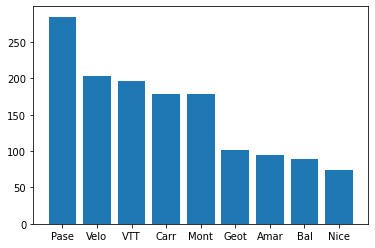

In [34]:
from matplotlib import pyplot as plt
plt.bar(P["Product"].apply(lambda x:x[:4]),P["Count"]);